<a href="https://colab.research.google.com/github/shirleysheng/anomaly_detection/blob/master/arima_interest_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


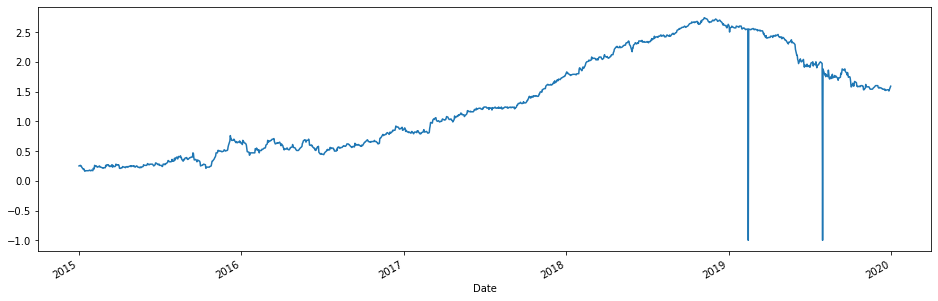

ADF Statistic: -1.333851
p-value: 0.613547
Test Statistics                  -1.333851
p-value                           0.613547
No. of lags used                 11.000000
Number of observations used    1238.000000
dtype: float64
ADF Statistic: -15.846170
p-value: 0.000000
Test Statistics               -1.584617e+01
p-value                        9.565999e-29
No. of lags used               1.000000e+01
Number of observations used    1.238000e+03
dtype: float64


In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


data = pd.read_csv('/content/IRs.csv',index_col=0)
data.index = pd.to_datetime(data.index)
interest_rate = data.iloc[:,3].dropna()

# Draw Plot
interest_rate.plot(figsize=(16, 5))
plt.show()


#test stationary
result_orig = adfuller(interest_rate)
print('ADF Statistic: %f' % result_orig[0])
print('p-value: %f' % result_orig[1])
output = pd.Series(result_orig[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)
# Therefore, we need to reject H0: this data is far from stationary


#Making the time series stationary
interest_rate_diff = interest_rate.diff().dropna()
result_diff = adfuller(interest_rate_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
output_diff = pd.Series(result_diff[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output_diff)

In [0]:
#divide train and test
#test_data = interest_rate_diff['2019']
#train_data = interest_rate_diff[~interest_rate_diff.isin(test_data)]

test_data = interest_rate['2019']
train_data = interest_rate[~interest_rate.isin(test_data)]

In [11]:
from pmdarima.arima import auto_arima
model = auto_arima(train_data.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-3976.502, BIC=-3957.559, Time=0.736 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-3972.228, BIC=-3962.756, Time=0.125 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-3971.020, BIC=-3956.813, Time=0.117 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-3970.896, BIC=-3956.688, Time=0.419 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-3961.407, BIC=-3956.671, Time=0.086 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-3977.764, BIC=-3954.085, Time=0.473 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=-3976.491, BIC=-3957.548, Time=0.135 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=-3974.598, BIC=-3946.183, Time=0.408 seconds
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=-3975.791, BIC=-3947.376, Time=0.657 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-3977.510, BIC=-3953.831, Time=0.446 seconds
Fit ARIMA(3,1,0)

In [0]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
history = [x for x in train_data]
predictions = list()
predict=list()


In [0]:
for t in range(len(test_data)):
    model.fit(history)
    output = model.predict(n_periods=1)
    predict.append(output[0])
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)



In [14]:
error = mean_squared_error(test_data, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.230


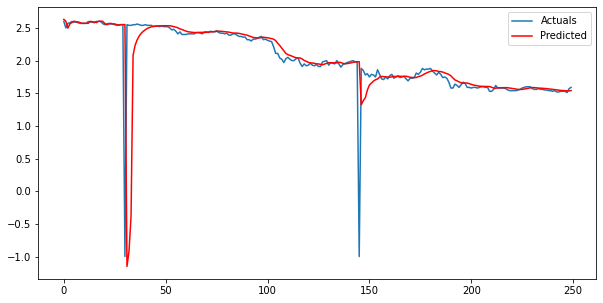

In [15]:
figsize=(10, 5)
plt.figure(figsize=figsize)
pyplot.plot(test_data.values,label='Actuals')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

date = []
for i in range(len(test_data)):
    if abs(test_data[i] - predictions[i]) >1:
        date_temp = test_data.index[i]
        date.append(date_temp)